# AVOCADO PRICE DATASET
Using the above dataset to build a Model using  Linear Regression to predict the price of Avocados. 

## BUSINESS OBJECTIVE
* Maximize Profits.
* Minimize Wastage.
* Maximize efficiency.
* Maximize Sustainable practices.

## CONSTRAINTS
* Price setting.
* Inflation. 
* Climate change. 

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | AveragePrice | Average price of a single avocado | Ratio    | Relevant      |
| 2 | Total_Volume | Total volume of avocados sold     | Ratio    | Relevant      |
| 3 | tot_ava1 | Total volume of Type 1 avocados sold  | Ratio    | Relevant      |
| 4 | tot_ava2 | Total volume of Type 1 avocados sold  | Ratio    | Relevant      |
| 5 | tot_ava3 | Total volume of Type 1 avocados sold  | Ratio    | Relevant      |
| 6 | Total_Bags | Total volume of bags sold           | Ratio  | Relevant      |
| 7 | Small_Bags | Total volume of small bags sold     | Ratio    | Relevant      |
| 8 | Large_Bags | Total volume of large  bags sold    | Ratio    | Relevant      |
| 9 | XLarge Bags| Total volume of extra large bags sold | Ratio    | Relevant      |
| 10 | type | Type of Avocados: Conventional or Organic  | Binary    | Relevant      |
| 11 | year | Years in which the sale of Avocados were recorded| Nominal  | Relevant     |
| 12 | region| Region in which the Avocados are sold | Nominal   | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass22\Avacado_Price.csv")
df=df0.copy()
df.head()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(18249, 12)

In [4]:
df.dtypes

AveragePrice    float64
Total_Volume    float64
tot_ava1        float64
tot_ava2        float64
tot_ava3        float64
Total_Bags      float64
Small_Bags      float64
Large_Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   tot_ava1      18249 non-null  float64
 3   tot_ava2      18249 non-null  float64
 4   tot_ava3      18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 AveragePrice    0
Total_Volume    0
tot_ava1        0
tot_ava2        0
tot_ava3        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 AveragePrice      259
Total_Volume    18237
tot_ava1        17702
tot_ava2        18103
tot_ava3        12071
Total_Bags      18097
Small_Bags      17321
Large_Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_18056\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


AveragePrice         1.405978
Total_Volume    850644.013009
tot_ava1        293008.424531
tot_ava2        295154.568356
tot_ava3         22839.735993
Total_Bags      239639.202060
Small_Bags      182194.686696
Large_Bags       54338.088145
XLarge Bags       3106.426507
year              2016.147899
dtype: float64

In [11]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_18056\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


AveragePrice         1.37
Total_Volume    107376.76
tot_ava1          8645.30
tot_ava2         29061.02
tot_ava3           184.99
Total_Bags       39743.83
Small_Bags       26362.82
Large_Bags        2647.71
XLarge Bags          0.00
year              2016.00
dtype: float64

In [12]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_18056\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_18056\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([[1.15, 569349.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        'conventional', 2017, 'Albany']], dtype=object), count=array([[  202,     2,   242,    61,  5497,    15,   159,  2370, 12048,
         9126,  5722,   338]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_18056\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


AveragePrice    1.621484e-01
Total_Volume    1.192698e+13
tot_ava1        1.600197e+12
tot_ava2        1.449906e+12
tot_ava3        1.154853e+10
Total_Bags      9.726741e+11
Small_Bags      5.567824e+11
Large_Bags      5.951939e+10
XLarge Bags     3.130385e+08
year            8.834843e-01
dtype: float64

In [14]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_18056\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


AveragePrice    4.026766e-01
Total_Volume    3.453545e+06
tot_ava1        1.264989e+06
tot_ava2        1.204120e+06
tot_ava3        1.074641e+05
Total_Bags      9.862424e+05
Small_Bags      7.461785e+05
Large_Bags      2.439660e+05
XLarge Bags     1.769289e+04
year            9.399385e-01
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [15]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_18056\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


AveragePrice     0.580303
Total_Volume     9.007687
tot_ava1         8.648220
tot_ava2         8.942466
tot_ava3        10.159396
Total_Bags       9.756072
Small_Bags       9.540660
Large_Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [16]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_18056\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


AveragePrice      0.325196
Total_Volume     92.104458
tot_ava1         86.809113
tot_ava2         91.949022
tot_ava3        132.563441
Total_Bags      112.272156
Small_Bags      107.012885
Large_Bags      117.999481
XLarge Bags     233.602612
year             -1.032747
dtype: float64

### GRAPHICAL REPRESENTATION

Using the scatter plot of Total volume vs Average price for both types of Avocados

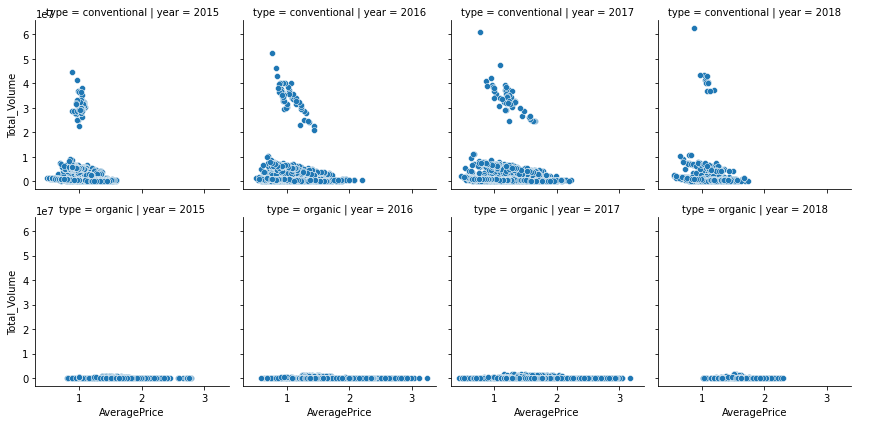

In [17]:
g = sns.FacetGrid(df, col="year",  row="type")
g.map_dataframe(sns.scatterplot, "AveragePrice", "Total_Volume")
g.add_legend()

From the above scatterplots we can deduce that:<br>
* The price of organic Avocados is always more than the conventional ones.
* The Volume of conventional Avocados is very high compared to the organic Avocados.
* The Volume of avocados sale is on a constant rise except for the 2018 year may be because the data presented may not be for the entire 2018.

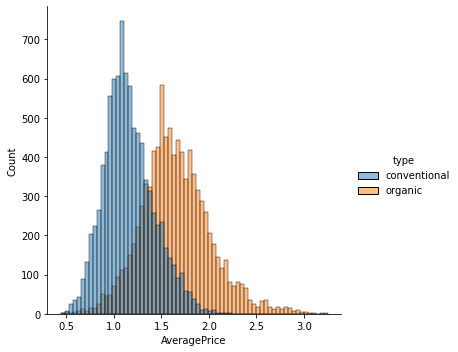

In [18]:
sns.displot(df, x="AveragePrice", hue="type")

The above plot also shows how the mean average price of organic Avocados are higher than the conventional avocados.

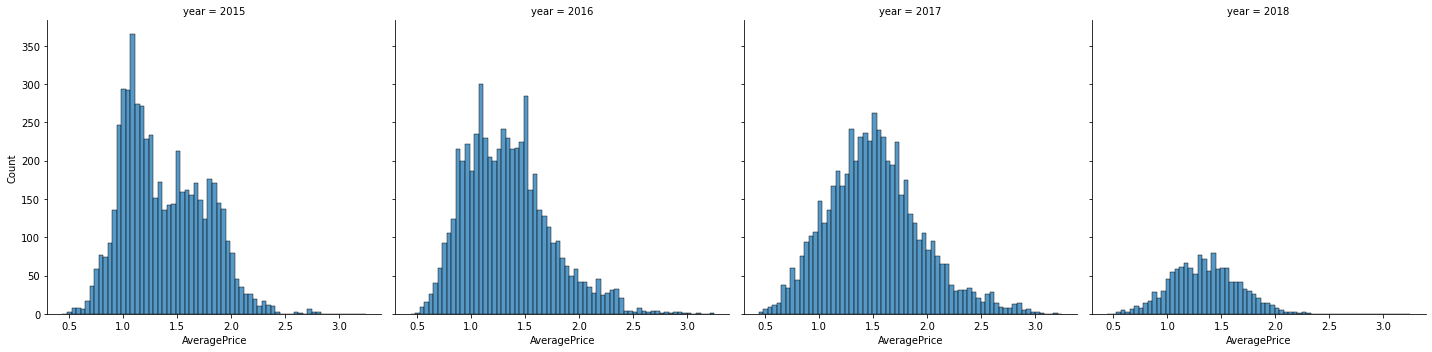

In [19]:
sns.displot(df, x="AveragePrice", col="year")

From the above plot we can see that the average price of Avocados is higher for both years 2017 and 2016. 

Using the factorplot to understand the average prices on the different regions for different years for both conventional and organic type of Avocados separately. 

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\lenny\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


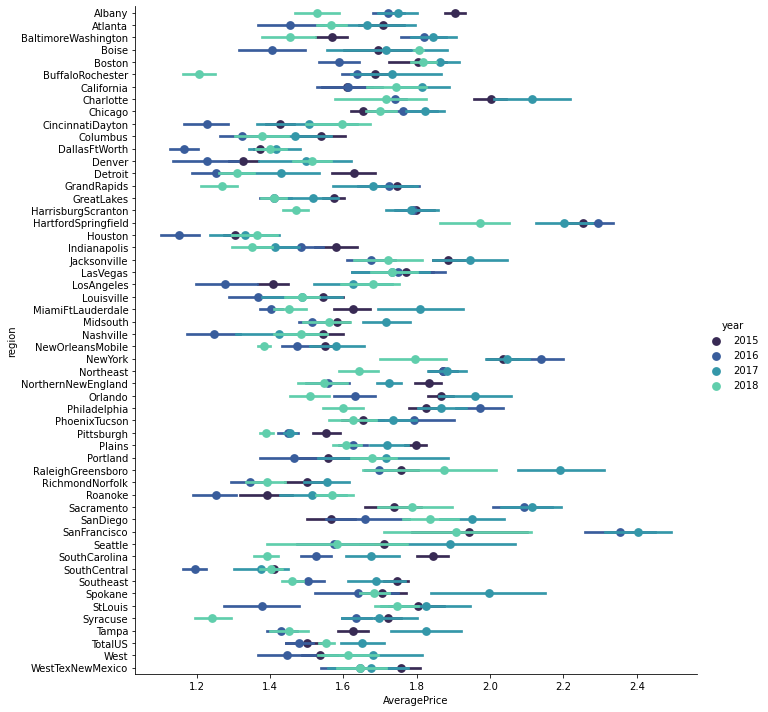

In [20]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],hue='year',size=10,aspect=1,palette='mako',join=False)

For Organic Avocados these are the insights that we can draw from the above factorplot:
* For most of the regions 2017 was the year in which prices have been very high.
* 2016 was a very odd year as prices were in both extremes for different regions wherein the prices were very high in some places and in some the lowest prices for eg: In hartford Springfield it was more than 2.2 dollars whereas in Houston it was less than 1.2 dollars in the same year
* Both Newyork and Hartfordspringfield have comparatively high average prices. 
* Both Southcentral and Houston have comparatively low average prices. 

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\lenny\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


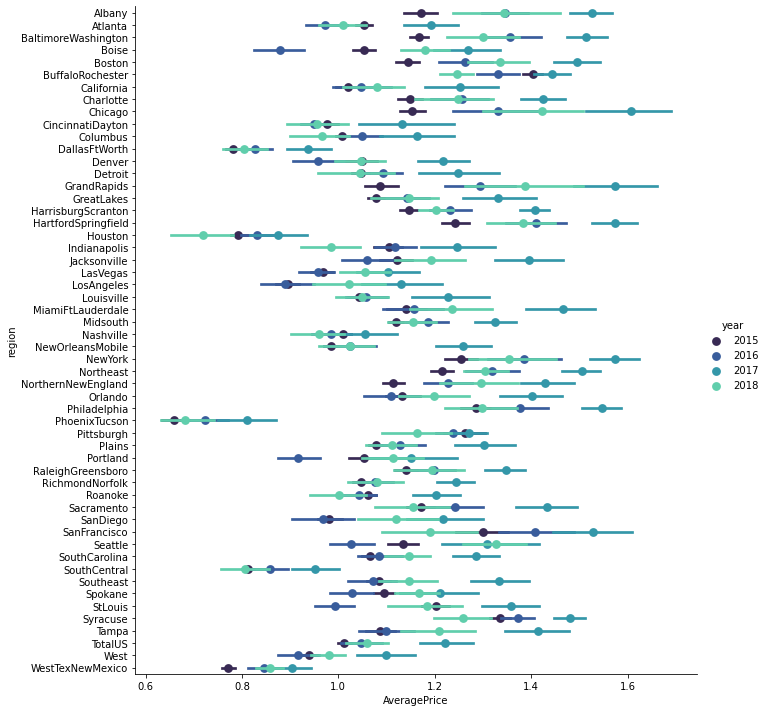

In [21]:
mask = df['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=10,
                   aspect=1,
                   palette='mako',
                   join=False,
              )

For Organic Avocados these are the insights that we can draw from the above factorplot:
* For most of the regions 2017 was the year in which prices have been very high.
* The average price for most of the regions lies between 1 to 1.4 dollars for conventional avocados. 
* Syracuse,Philadelphia,BuffaloRochester, Newyork and Hartfordspringfield have comparatively high average prices. 
* Both PhoenixTucson and Dallasftworth have comparatively low average prices. 

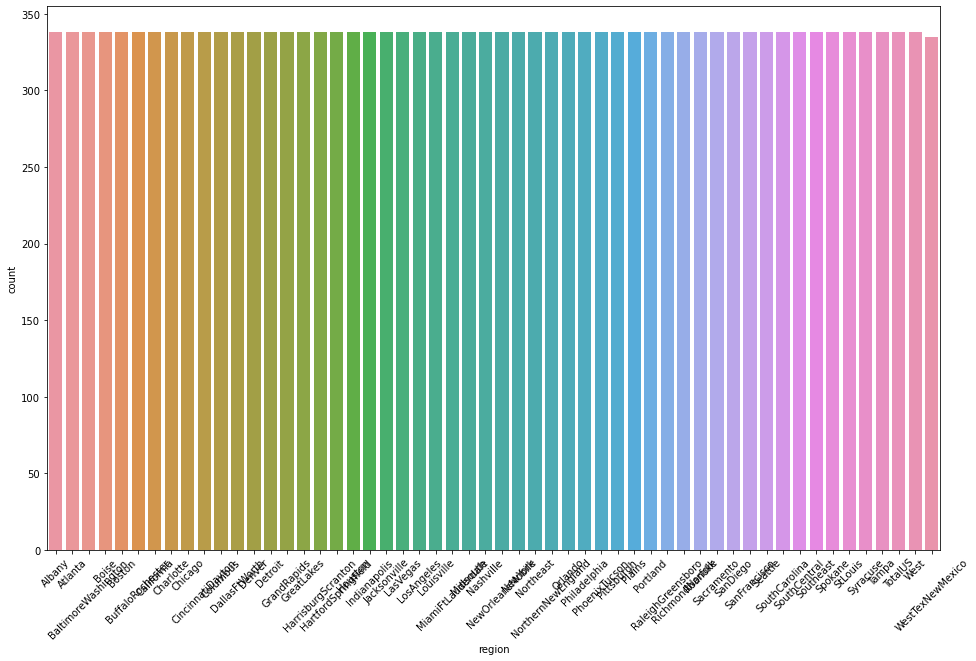

In [22]:
plt.figure(1, figsize=(16, 10))
sns.countplot(x=df["region"])
plt.xticks(rotation = 45)
plt.show()

The above countplot shows that the data is distributed almost equally among all the regions. 

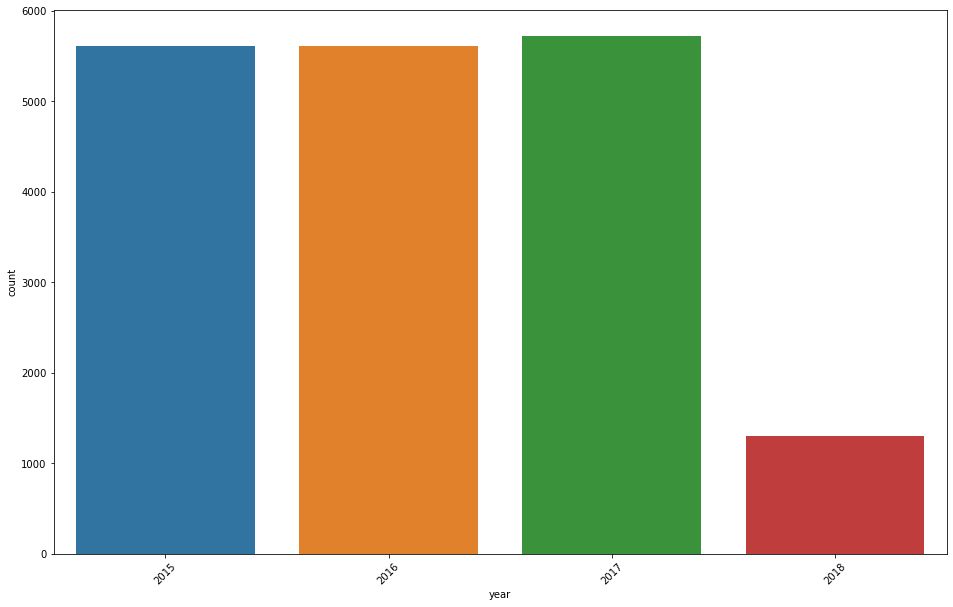

In [23]:
plt.figure(1, figsize=(16, 10))
sns.countplot(x=df["year"])
plt.xticks(rotation = 45)
plt.show()

Using the QQ-plot to understand the distribution of the label variable.from the below plot we can understand that the distribution is normal with slight right skewness.  

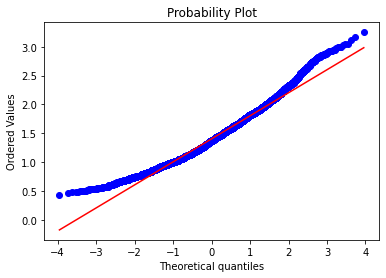

In [24]:
from scipy import stats
import pylab
stats.probplot(df['AveragePrice'], dist = "norm", plot = pylab)
plt.show()

Plotting boxplots of each variable.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AveragePrice'>

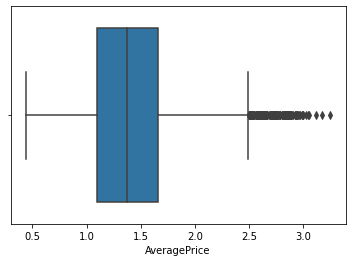

In [25]:
sns.boxplot(df["AveragePrice"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Volume'>

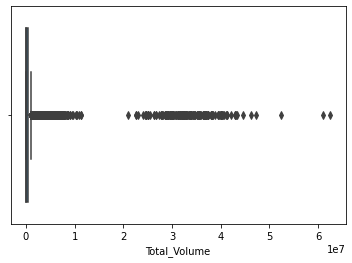

In [26]:
sns.boxplot(df['Total_Volume'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tot_ava1'>

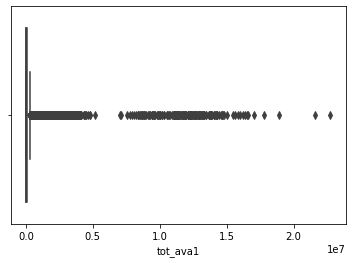

In [27]:
sns.boxplot(df['tot_ava1'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tot_ava2'>

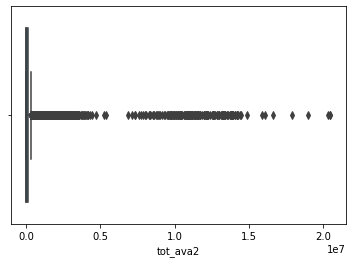

In [28]:
sns.boxplot(df['tot_ava2'])

In [29]:
df.columns

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tot_ava3'>

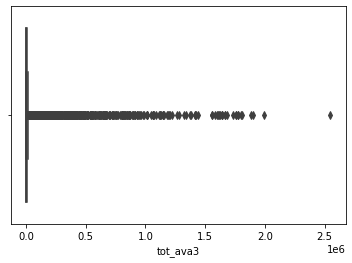

In [30]:
sns.boxplot(df['tot_ava3'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Bags'>

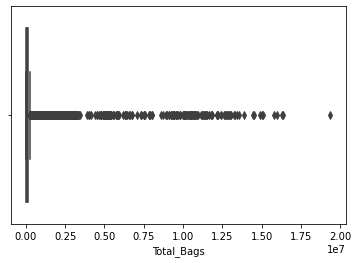

In [31]:
sns.boxplot(df['Total_Bags'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Small_Bags'>

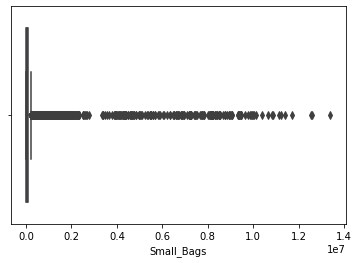

In [32]:
sns.boxplot(df['Small_Bags'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Large_Bags'>

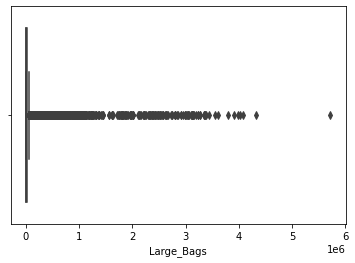

In [33]:
sns.boxplot(df['Large_Bags'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='XLarge Bags'>

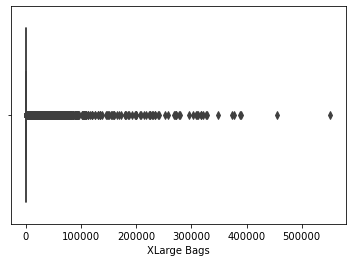

In [34]:
sns.boxplot(df['XLarge Bags'])

From the boxplots it is very evident that there are outliers in the dataset so using the below custom function calculated the number of outliers in each variable.

In [35]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [36]:
sum(outlier_func(df["AveragePrice"]))

209

In [37]:
sum(outlier_func(df['Total_Volume']))

2297

In [38]:
sum(outlier_func(df['tot_ava1']))

2518

In [39]:
sum(outlier_func(df['tot_ava2']))

2519

In [40]:
sum(outlier_func(df['tot_ava3']))

2918

In [41]:
sum(outlier_func(df['Total_Bags']))

2533

In [42]:
sum(outlier_func(df['Small_Bags']))

2407

In [43]:
sum(outlier_func(df['Large_Bags']))

2707

In [44]:
sum(outlier_func(df['XLarge Bags']))

4014

In [45]:
from feature_engine.outliers import Winsorizer

In [46]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['AveragePrice'])

df['AveragePrice']= winsor.fit_transform(df[['AveragePrice']])
sum(outlier_func(df['AveragePrice']))

0

In [47]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Total_Volume'])

df['Total_Volume']= winsor.fit_transform(df[['Total_Volume']])
sum(outlier_func(df['Total_Volume']))

0

In [48]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['tot_ava1'])

df['tot_ava1']= winsor.fit_transform(df[['tot_ava1']])
sum(outlier_func(df['tot_ava1']))

0

In [49]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['tot_ava2'])

df['tot_ava2']= winsor.fit_transform(df[['tot_ava2']])
sum(outlier_func(df['tot_ava2']))

0

In [50]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['tot_ava3'])

df['tot_ava3']= winsor.fit_transform(df[['tot_ava3']])
sum(outlier_func(df['tot_ava3']))

0

In [51]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Total_Bags'])

df['Total_Bags']= winsor.fit_transform(df[['Total_Bags']])
sum(outlier_func(df['Total_Bags']))

0

In [52]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Small_Bags'])

df['Small_Bags']= winsor.fit_transform(df[['Small_Bags']])
sum(outlier_func(df['Small_Bags']))

0

In [53]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Large_Bags'])

df['Large_Bags']= winsor.fit_transform(df[['Large_Bags']])
sum(outlier_func(df['Large_Bags']))

0

In [54]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['XLarge Bags'])

df['XLarge Bags']= winsor.fit_transform(df[['XLarge Bags']])
sum(outlier_func(df['XLarge Bags']))

0

__CORRELATION CHART__

<AxesSubplot:>

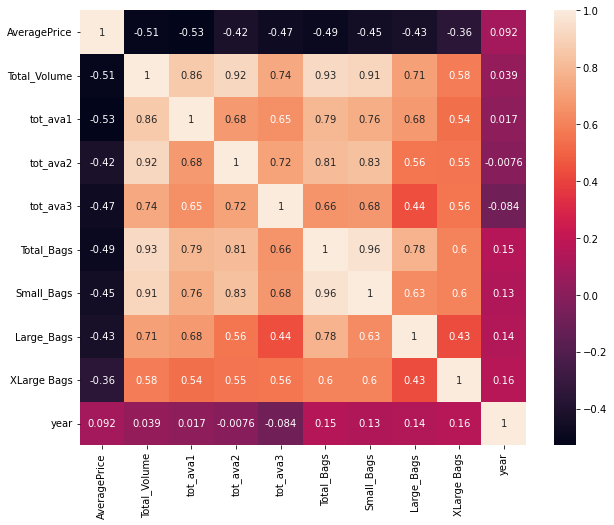

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

from the correlation chart we can understand that most of the variables have a negative relation with the strength being moderate. 

__One Hot Encoding__<br>
One hot encoding the categorical variables so that we can consider them in model building using the pandas get_dummies function. 

In [56]:
df_enc=df.drop(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3','Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags'],axis=1,)

df_enc = pd.get_dummies(df_enc, columns = ['type', 'year','region'])
df_enc.head()

,type_conventional,type_organic,year_2015,year_2016,year_2017,year_2018,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dropping the categorical variables which have been one hot encoded. 

In [57]:
df.drop(['region','type','year'],axis=1,inplace=True)

Joining the one hot encoded values to the original dataset and forming a new dataframe. 

In [58]:
df_new=df.join(df_enc)
df_new.head()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type_conventional,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,...,0,0,0,0,0,0,0,0,0,0


Renaming the columns of the dataset to make it easier for building the model. 

In [59]:
df_new.rename(columns={df_new.columns[0]:'AP', df_new.columns[1]: 'TV', df_new.columns[2]: 'T1',df_new.columns[3]:'T2',
                      df_new.columns[4]: 'T3', df_new.columns[5]: 'TB', df_new.columns[6]: 'SB',
                      df_new.columns[7]:'LB', df_new.columns[8]: 'XB',df_new.columns[9]:'TC',df_new.columns[10]:'TO',
                      df_new.columns[11]:'Y5', df_new.columns[12]: 'Y6',df_new.columns[13]:'Y7',df_new.columns[14]:'Y8',
                      df_new.columns[15]: 'AY', df_new.columns[16]: 'AA', df_new.columns[17]: 'BW',
                      df_new.columns[18]:'BE', df_new.columns[19]: 'BN',df_new.columns[20]:'BR',df_new.columns[21]:'CA',
                      df_new.columns[22]:'CE', df_new.columns[23]: 'CO',df_new.columns[24]:'CD',
                      df_new.columns[25]: 'CS', df_new.columns[26]: 'DF', df_new.columns[27]: 'DR',
                      df_new.columns[28]:'DT', df_new.columns[29]: 'GR',df_new.columns[30]:'GL',df_new.columns[31]:'HS',
                      df_new.columns[32]:'HF', df_new.columns[33]: 'HN',df_new.columns[34]:'IP',
                      df_new.columns[35]: 'JV', df_new.columns[36]: 'LL', df_new.columns[37]: 'LA',
                      df_new.columns[38]:'LV', df_new.columns[39]: 'ML',df_new.columns[40]:'MS',df_new.columns[41]:'NV',
                      df_new.columns[42]:'NO', df_new.columns[43]: 'NY',df_new.columns[44]:'NE',
                      df_new.columns[45]: 'NN', df_new.columns[46]: 'OL', df_new.columns[47]: 'PP',
                      df_new.columns[48]:'PT', df_new.columns[49]: 'PB',df_new.columns[50]:'P',df_new.columns[51]:'PL',
                      df_new.columns[52]:'RG', df_new.columns[53]: 'RN',df_new.columns[54]:'RK',
                      df_new.columns[55]: 'SM', df_new.columns[56]: 'SD', df_new.columns[57]: 'SF',
                      df_new.columns[58]:'ST', df_new.columns[59]: 'SC',df_new.columns[60]:'SL',df_new.columns[61]:'SE',
                      df_new.columns[62]:'SK', df_new.columns[63]: 'SS',df_new.columns[64]:'SY',
                      df_new.columns[65]: 'TA', df_new.columns[66]: 'TU', df_new.columns[67]: 'WE',
                      df_new.columns[68]:'WN'},inplace=True)

__MODEL BUILDING__

Importing the library required for model building

In [60]:
import statsmodels.formula.api as smf

Fitting the model.

In [61]:
model = smf.ols('AP ~ TV + T1 + T2 + T3 + TB + SB + LB + XB + TC + TO + Y5+ Y6+Y7+Y8+AY+AA+BW+BE+BN+BR+CA+CE+CO+CD+CS+DF+DR+DT+GR+GL+HS+HF+HN+IP+JV+LL+LA+LV+ML+MS+NV+NO+NY+NE+NN+OL+PP+PT+PB+P+PL+RG+RN+RK+SM+SD+SF+ST+SC+SL+SE+SK+SS+SY+TA+TU+WE+WN', data = df_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AP   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     440.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:53:55   Log-Likelihood:                -337.18
No. Observations:               18249   AIC:                             806.4
Df Residuals:                   18183   BIC:                             1322.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8275      0.003    308.985      0.000       0.822       0.833
TV         -3.215e-07   3.71e-08     -8.671      0.000   -3.94e-07   -2.49e-07
T1            1.7e-07   5.96e-08      2.853      0.004    5.32e-08    2.87e-07
T2          2.198e-07   5.86e-08      3.751      0.000    1.05e-07    3.35e-07
T3          -2.78e-06   5.75e-07     -4.835      0.000   -3.91e-06   -1.65e-06
TB         -3.698e-07   1.35e-07     -2.743      0.006   -6.34e-07   -1.06e-07
SB          3.335e-07    1.5e-07      2.227      0.026    3.99e-08    6.27e-07
LB         -9.746e-07   2.27e-07     -4.299      0.000   -1.42e-06    -5.3e-07
XB             0.0003   1.93e-05     15.128      0.000       0.000       0.000
TC             0.2197      0.005     46.389      0.000       0.210       0.229
TO             0.6078      0.003    215.779      0.000       0.602       0.613
Y5             0.1861      0.003     54.332      0.000       0.179       0.193
Y6             0.1516      0.003     47.027      0.000       0.145       0.158
Y7             0.3224      0.003     99.337      0.000       0.316       0.329
Y8             0.1675      0.006     28.973      0.000       0.156       0.179
AY             0.1001      0.014      7.287      0.000       0.073       0.127
AA            -0.0509      0.014     -3.671      0.000      -0.078      -0.024
BW             0.1596      0.014     11.452      0.000       0.132       0.187
BE            -0.1005      0.014     -7.329      0.000      -0.127      -0.074
BN             0.1258      0.014      9.006      0.000       0.098       0.153
BR             0.0664      0.014      4.880      0.000       0.040       0.093
CA             0.0677      0.014      4.798      0.000       0.040       0.095
CE             0.1764      0.014     12.862      0.000       0.150       0.203
CO             0.1741      0.014     12.257      0.000       0.146       0.202
CD            -0.2036      0.014    -14.540      0.000      -0.231      -0.176
CS            -0.2003      0.014    -14.710      0.000      -0.227      -0.174
DF            -0.2464      0.014    -17.677      0.000      -0.274      -0.219
DR            -0.0861      0.014     -6.021      0.000      -0.114      -0.058
DT            -0.1472      0.014    -10.712      0.000      -0.174      -0.120
GR             0.0465      0.014      3.384      0.001       0.020       0.074
GL             0.0349      0.014      2.421      0.015       0.007       0.063
HS             0.0664      0.014      4.899      0.000       0.040       0.093
HF             0.3679      0.014     26.736      0.000       0.341       0.395
HN            -0.2596      0.014    -18.750      0.000      -0.287      -0.232
IP            -0.1287      0.014     -9.419      0.000      -0.155      -0.102
JV             0.0717      0.014      5.258      0.000       0.045       0.098
LL

Dropping the variables of the coefficients which have probability value more than 0.05 as checking vif values would be very complex. 

In [62]:
df_new.drop(['LL','SD','SC','SK','SS','TA','WE'],axis=1,inplace=True)

In [63]:
model1 = smf.ols('AP ~ TV + T1 + T2 + T3 + TB + SB + LB + XB + TC + TO + Y5+ Y6+Y7+Y8+AY+AA+BW+BE+BN+BR+CA+CE+CO+CD+CS+DF+DR+DT+GR+GL+HS+HF+HN+IP+JV+LA+LV+ML+MS+NV+NO+NY+NE+NN+OL+PP+PT+PB+P+PL+RG+RN+RK+SM+SF+ST+SL+SE+SY+TU+WN', data = df_new).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AP   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     485.0
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:53:56   Log-Likelihood:                -338.52
No. Observations:               18249   AIC:                             797.0
Df Residuals:                   18189   BIC:                             1266.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8225      0.004    222.780      0.000       0.815       0.830
TV         -3.257e-07   3.65e-08     -8.911      0.000   -3.97e-07   -2.54e-07
T1           1.82e-07   5.87e-08      3.099      0.002    6.69e-08    2.97e-07
T2          2.268e-07   5.74e-08      3.950      0.000    1.14e-07    3.39e-07
T3         -2.812e-06   5.62e-07     -5.003      0.000   -3.91e-06   -1.71e-06
TB         -3.731e-07   1.35e-07     -2.773      0.006   -6.37e-07   -1.09e-07
SB           3.49e-07   1.49e-07      2.349      0.019    5.78e-08     6.4e-07
LB         -9.434e-07    2.2e-07     -4.290      0.000   -1.37e-06   -5.12e-07
XB             0.0003   1.93e-05     15.173      0.000       0.000       0.000
TC             0.2161      0.004     48.083      0.000       0.207       0.225
TO             0.6063      0.003    196.509      0.000       0.600       0.612
Y5             0.1851      0.003     53.147      0.000       0.178       0.192
Y6             0.1504      0.003     45.858      0.000       0.144       0.157
Y7             0.3210      0.003     97.216      0.000       0.315       0.328
Y8             0.1659      0.006     28.662      0.000       0.155       0.177
AY             0.1086      0.015      7.346      0.000       0.080       0.138
AA            -0.0441      0.015     -3.012      0.003      -0.073      -0.015
BW             0.1671      0.015     10.927      0.000       0.137       0.197
BE            -0.0921      0.015     -6.285      0.000      -0.121      -0.063
BN             0.1336      0.015      8.722      0.000       0.104       0.164
BR             0.0746      0.015      5.084      0.000       0.046       0.103
CA             0.0737      0.015      4.860      0.000       0.044       0.103
CE             0.1848      0.015     12.545      0.000       0.156       0.214
CO             0.1822      0.016     11.694      0.000       0.152       0.213
CD            -0.1957      0.015    -13.034      0.000      -0.225      -0.166
CS            -0.1922      0.015    -13.168      0.000      -0.221      -0.164
DF            -0.2394      0.015    -15.823      0.000      -0.269      -0.210
DR            -0.0788      0.015     -5.156      0.000      -0.109      -0.049
DT            -0.1394      0.015     -9.447      0.000      -0.168      -0.110
GR             0.0550      0.015      3.701      0.000       0.026       0.084
GL             0.0405      0.015      2.662      0.008       0.011       0.070
HS             0.0744      0.015      5.070      0.000       0.046       0.103
HF             0.3759      0.015     25.101      0.000       0.347       0.405
HN            -0.2528      0.015    -16.928      0.000      -0.282      -0.224
IP            -0.1206      0.015     -8.200      0.000      -0.149      -0.092
JV             0.0795      0.015      5.471      0.000       0.051       0.108
LA

The values we are concerned with are -<br>

* __R-squared/Ajusted R-squared__<br>
    R-squared value is 0.611. This shows that 61% of the variance in the dependent variable  can be explained by remaining relevant columns.<br>
* __F statistic  p value and its significance__<br>
    F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.<br>
* __The coefficients and significance (p-values)__<br>
    The coefficients of the independent variables have a very low p-value closer to zero which means they are statistically significant.<br>

From the above values we can say that the fit is significant.<br>

__QQ PLOT__<br>
Plotting the QQ-plot to understand the distribution of the Residuals.Residuals in a statistical or machine learning model are the differences between observed and predicted values of data.

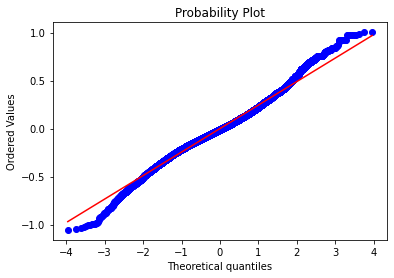

In [64]:
pred = model1.predict(df_new)
res = model1.resid
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

Normality of the residuals is an assumption of running a linear model. So, if our residuals are normal, it means that our assumption is valid and model inference should also be valid.Here the residual follows a normal distribution as seen in the above plot. 

__Residuals vs Fitted plot__

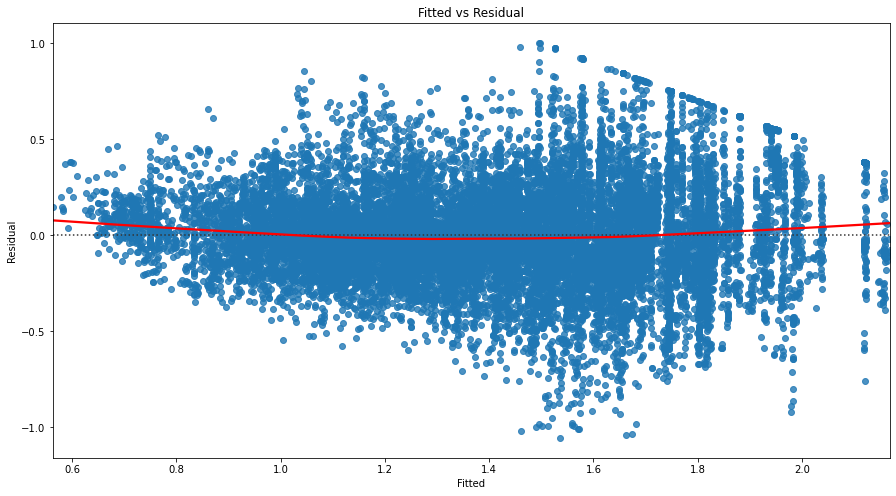

In [65]:
# Residuals vs Fitted plot
plt.figure(figsize=(15,8))
sns.residplot(x = pred, y = df_new.AP, lowess = True,line_kws=dict(color="r"))
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

From the above plot we can see that although the residuals form a horizontal band along the zero line and that no residuals stand out, we can clearly see that it has a pattern which suggest it has heteroscedasticity which affects the precision of the model. 

Splitting the dataset to check the rmse values for both the test and train dataset which will help us to understand how well the model works.

In [66]:
df_train, df_test = train_test_split(df_new, test_size = 0.3, random_state =457) 

In [67]:
# preparing the model on train data 
model_train = smf.ols('AP ~ TV + T1 + T2 + T3 + TB + SB + LB + XB + TC + TO + Y5+ Y6+Y7+Y8+AY+AA+BW+BE+BN+BR+CA+CE+CO+CD+CS+DF+DR+DT+GR+GL+HS+HF+HN+IP+JV+LA+LV+ML+MS+NV+NO+NY+NE+NN+OL+PP+PT+PB+P+PL+RG+RN+RK+SM+SF+ST+SL+SE+SY+TU+WN', data = df_new).fit()

In [68]:
# prediction on test data set 
test_pred = model_train.predict(df_test)

# test residual values 
test_resid = test_pred - df_test.AP
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

0.24693608623357685

In [69]:
# train_data prediction
train_pred = model_train.predict(df_train)

# train residual values 
train_resid  = train_pred - df_train.AP
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

0.24631446474470284

### CONCLUSION

This model is not good for prediction as the r-square values  are also low and the residuals also show heteroscadsticity which is affecting the precision of the model.So the best option is to use another model for this dataset. 